# Read and Parse Chainer logs

# CIFAR100 VGG model with Adam  optimizer
## 64 runs with same hyper-parameters x 500 epochs on DL server 
b512

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os

In [3]:
!ls logs/series/Adam64x500

cifar_adam_e500_run_0.log  cifar_adam_e500_run_38.log
cifar_adam_e500_run_1.log  cifar_adam_e500_run_39.log
cifar_adam_e500_run_10.log cifar_adam_e500_run_4.log
cifar_adam_e500_run_11.log cifar_adam_e500_run_40.log
cifar_adam_e500_run_12.log cifar_adam_e500_run_41.log
cifar_adam_e500_run_13.log cifar_adam_e500_run_42.log
cifar_adam_e500_run_14.log cifar_adam_e500_run_43.log
cifar_adam_e500_run_15.log cifar_adam_e500_run_44.log
cifar_adam_e500_run_16.log cifar_adam_e500_run_45.log
cifar_adam_e500_run_17.log cifar_adam_e500_run_46.log
cifar_adam_e500_run_18.log cifar_adam_e500_run_47.log
cifar_adam_e500_run_19.log cifar_adam_e500_run_48.log
cifar_adam_e500_run_2.log  cifar_adam_e500_run_49.log
cifar_adam_e500_run_20.log cifar_adam_e500_run_5.log
cifar_adam_e500_run_21.log cifar_adam_e500_run_50.log
cifar_adam_e500_run_22.log cifar_adam_e500_run_51.log
cifar_adam_e500_run_23.log cifar_adam_e500_run_52.log
cifar_adam_e500_run_24.log cifar_adam_e500_run_53.log
cifar_adam_e500_run_25.log cif

In [4]:
filename_pattern=re.compile(r"cifar_adam_e500.*\.log")

In [5]:
logs_directory =  "logs/series/Adam64x500"
list_command = "ls -1 "+logs_directory
files=[]
proc = subprocess.Popen(list_command.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    line = line.strip(" \n")
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logs_directory,line)))
#files

In [6]:
run_pattern = re.compile(r"cifar_.*run_(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
def fileToDF(logfile):
    remove_str="[J"
    global run_pattern
    global output_pattern
    m = run_pattern.search(logfile)
    if m:
        run = int(m.group(1))        
    else:
        print "No match in filename:",logfile
        return None
    with open(logfile,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0
        ind = 0
        loss = 0
        acc = 0
        learn = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
        for line in lines:
            s = line.strip(' \n')
            s = s.replace(remove_str,"")
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1
                    
    return df

In [7]:
df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(32000, 5)


,run,epoch,loss,acc,time
0,0.0,1.0,4.71910,0.010110,24.5502
1,0.0,2.0,4.92875,0.020157,48.3813
2,0.0,3.0,4.35085,0.030595,72.1387
3,0.0,4.0,4.44522,0.037345,96.2896
4,0.0,5.0,3.86801,0.076586,120.5100


In [8]:
df_loss = df.pivot(index="epoch",columns="run")["loss"]
df_acc = df.pivot(index="epoch",columns="run",values="acc")
df_time = df.pivot(index="epoch",columns="run",values="time")
df_acc.head()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
1.0,0.010110,0.010036,0.010024,0.010024,0.010219,0.010110,0.010110,0.010110,0.011575,0.010110,...,0.010110,0.010110,0.009852,0.010110,0.010024,0.010024,0.010024,0.011391,0.012138,0.011977
2.0,0.020157,0.021329,0.013333,0.020111,0.010501,0.023650,0.012184,0.011673,0.024236,0.017193,...,0.013637,0.013574,0.011793,0.017153,0.024799,0.023932,0.019037,0.016240,0.010794,0.019009
3.0,0.030595,0.020904,0.036345,0.028010,0.042147,0.026540,0.034392,0.020330,0.052706,0.035357,...,0.035702,0.028935,0.027154,0.029791,0.033634,0.037310,0.031072,0.039275,0.040338,0.044261
4.0,0.037345,0.041659,0.054124,0.041659,0.040878,0.042096,0.042429,0.044479,0.056870,0.036851,...,0.045393,0.032353,0.047076,0.050023,0.031646,0.045209,0.058180,0.064539,0.036788,0.062735
5.0,0.076586,0.067860,0.069692,0.061265,0.068704,0.084306,0.040142,0.056934,0.086144,0.071582,...,0.052281,0.058071,0.060909,0.051350,0.081692,0.068715,0.065539,0.059789,0.083623,0.077798


In [9]:
df_time.tail()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
496.0,11858.1,11850.0,11749.4,11972.5,11783.9,11765.7,11729.6,12292.2,11748.4,11730.2,...,11738.7,11771.1,11781.3,11779.2,11866.5,11875.4,11986.5,11811.6,11656.6,11709.2
497.0,11882.1,11874.0,11773.1,11996.7,11807.7,11789.5,11753.3,12316.0,11772.1,11753.8,...,11762.5,11794.9,11805.1,11803.0,11890.4,11899.4,12010.6,11835.4,11680.2,11732.9
498.0,11905.8,11897.7,11796.6,12020.6,11831.3,11813.0,11776.7,12339.7,11795.7,11777.3,...,11786.0,11818.4,11828.7,11826.6,11914.2,11923.1,12034.5,11859.0,11703.5,11756.3
499.0,11929.7,11921.6,11820.3,12044.8,11855.1,11836.8,11800.4,12363.6,11819.4,11801.0,...,11809.7,11842.2,11852.5,11850.4,11938.1,11947.1,12058.7,11882.9,11727.0,11779.9
500.0,11953.7,11945.5,11844.0,12069.0,11879.1,11860.5,11824.1,12387.4,11843.1,11824.7,...,11833.5,11866.0,11876.3,11874.1,11962.1,11971.0,12082.8,11906.7,11750.5,11803.5


In [19]:
def plot(df,**kwargs):
    ax = df.plot(**kwargs)
    ax.set_xlim(0,500)
    major = np.arange(0,501,100)
    ax.set_xticks(major)
    ax.xaxis.grid(which="major", linestyle=":",color="#cccccc")
    minor = np.arange(25,476,25)
    ax.set_xticks(minor, minor=True)
    ax.xaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.5)
    ax.yaxis.grid(linestyle="-",color="black",alpha=0.05)
    ax.yaxis.grid(which="minor", linestyle="-",color="#cccccc",alpha=0.5)
    return ax

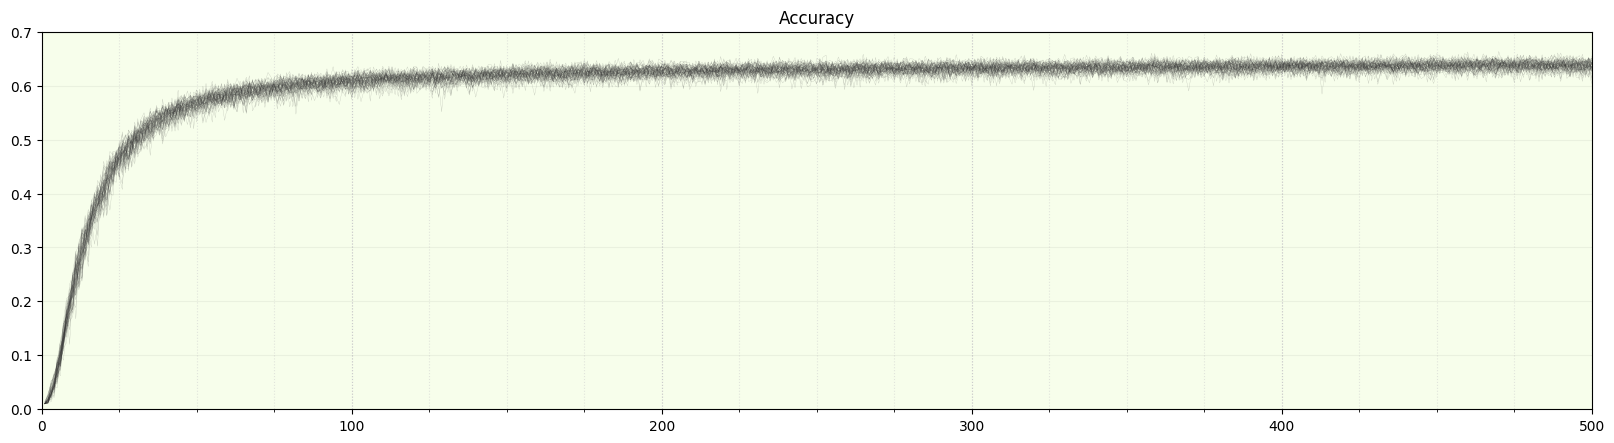

In [20]:
ax = plot(df_acc,legend=False,figsize=(20,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_ylim(0,.7)
ax.set_facecolor("#F7FEEB")

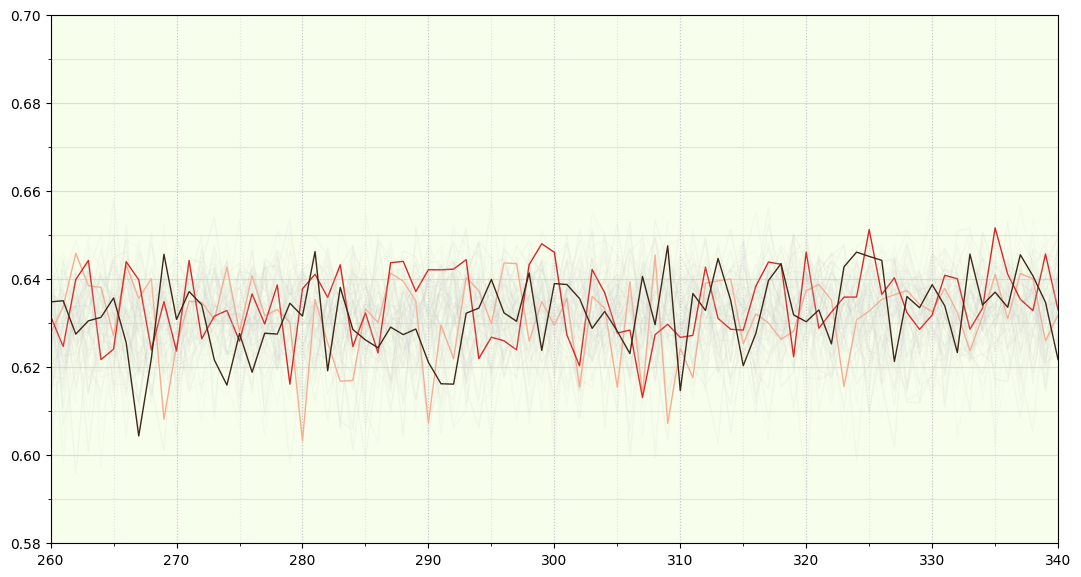

In [67]:
color_1 = (np.arange(10,30,dtype=float)) / 100
colors0 = cm.Reds([.3])
colors1 = cm.binary(color_1,alpha=0.1)
colors2 = cm.Reds([.7])
colors3 = cm.copper([.2])
colors = np.vstack((colors1,colors0,colors1,colors2,colors1,colors3))

default_FS = matplotlib.rcParams["font.size"]
matplotlib.rcParams.update({'font.size': 10})
ax = plot(df_acc,legend=False,figsize=(13,7),linewidth=1,color=colors)
ax.set_xlabel("")
ax.set_ylim(.58,.7)
ax.set_yticks(np.arange(.58,.71,.01),minor=True)
xmin=260
xmax=340
ax.set_xlim(xmin,xmax)
ax.set_facecolor("#F7FEEB")
#ax.legend()
ax.set_xticks(np.arange(xmin,xmax+1,10))
ax.set_xticks(np.arange(xmin,xmax+1,5),minor=True)
matplotlib.rcParams.update({'font.size': default_FS})

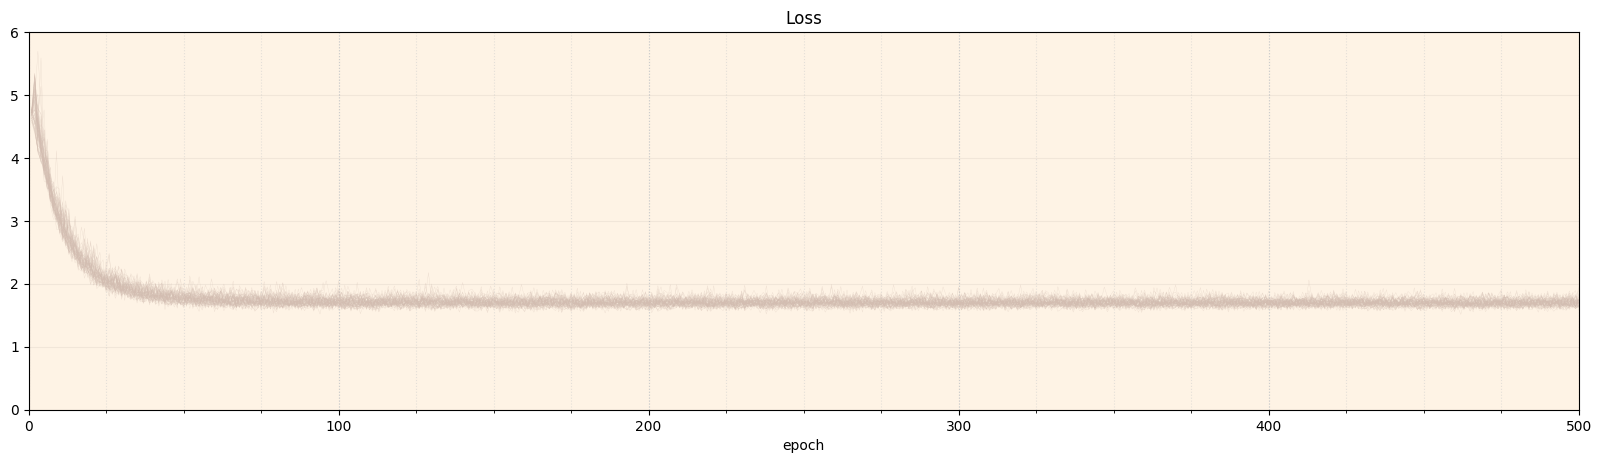

In [27]:
ax = plot(df_loss,legend=False,figsize=(20,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_ylim(0,6)
ax.set_facecolor("#FEF3E5")

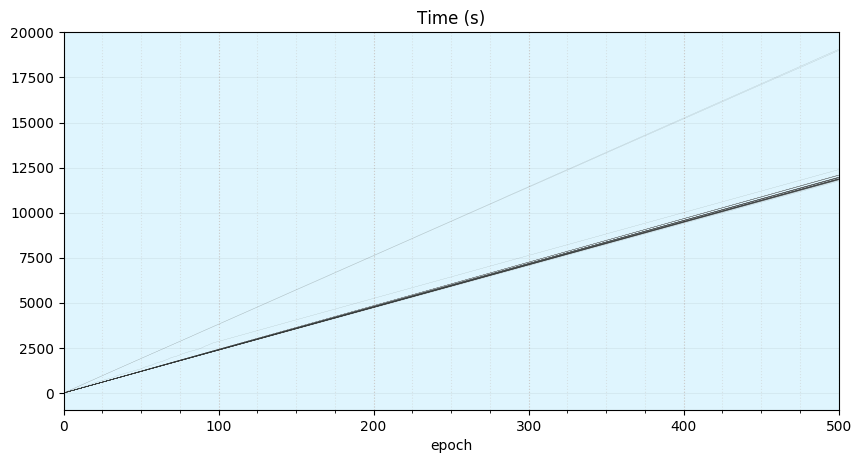

In [28]:
ax = plot(df_time,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Time (s)")
#ax.set_ylabel("s")
ax.set_facecolor("#00B7FA20")

In [29]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [30]:
slice_epoch = [10.,25.,50.,200.,500.]
df_loss.iloc[-3:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
498.0,1.68012,1.69531,1.64780,1.70965,1.72059,1.72571,1.72702,1.82607,1.68717,1.66657,...,1.76323,1.74905,1.83105,1.76752,1.73858,1.67121,1.72856,1.65272,1.69588,1.64640
499.0,1.63835,1.64941,1.61022,1.64715,1.70069,1.65607,1.63188,1.63897,1.78664,1.69083,...,1.64536,1.62652,1.89308,1.69237,1.77484,1.61457,1.81269,1.70470,1.75334,1.72427
500.0,1.70840,1.69731,1.64992,1.73144,1.78917,1.70035,1.81530,1.74871,1.62958,1.74843,...,1.62097,1.66449,1.67493,1.64960,1.89629,1.65939,1.65716,1.74227,1.68962,1.72948


In [31]:
df_loss_p = df_loss.copy()
df_acc_p = df_acc.copy()
df_time_p = df_time.copy()
i = 0
index = []
for i in range(0,len(slice_epoch)):
    name = str(int(slice_epoch[i]))
    index.append(name)
    df_loss_p.loc[name] = RelativePercentDifference(df_loss_p.loc[slice_epoch[i]])
    df_acc_p.loc[name] = RelativePercentDifference(df_acc_p.loc[slice_epoch[i]])
    df_time_p.loc[name] = RelativePercentDifference(df_time_p.loc[slice_epoch[i]])
df_loss_p.iloc[-5:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
10,98.794173,105.687208,91.647852,99.786372,98.478711,109.401410,92.737897,102.057762,96.770833,100.643420,...,98.895291,105.879954,108.033209,95.783215,100.644402,99.011135,107.875479,101.339792,97.708710,96.475987
25,105.921807,95.742169,102.836995,97.307218,104.256447,95.450974,96.431199,100.227930,93.030358,101.791031,...,107.312043,99.361163,97.471806,99.038317,98.670671,105.885773,104.535468,95.075537,98.197845,99.769712
50,101.762229,99.595058,104.587061,102.816178,92.671286,101.785939,101.316827,105.366655,95.205957,98.806995,...,99.001188,99.643042,94.897732,100.623039,98.095142,99.247881,105.189962,103.679886,95.865874,95.933051
200,98.333967,93.716815,98.146475,107.585371,95.410144,97.654749,96.802188,103.562534,101.294935,95.756239,...,99.707734,110.531009,100.065621,102.903362,100.154650,98.940075,98.781473,103.154531,97.068098,104.179255
500,99.774512,99.126831,96.359145,101.120102,104.491667,99.304374,106.017720,102.128710,95.171242,102.112357,...,94.668398,97.210067,97.819787,96.340456,110.747723,96.912215,96.781978,101.752599,98.677717,101.005633


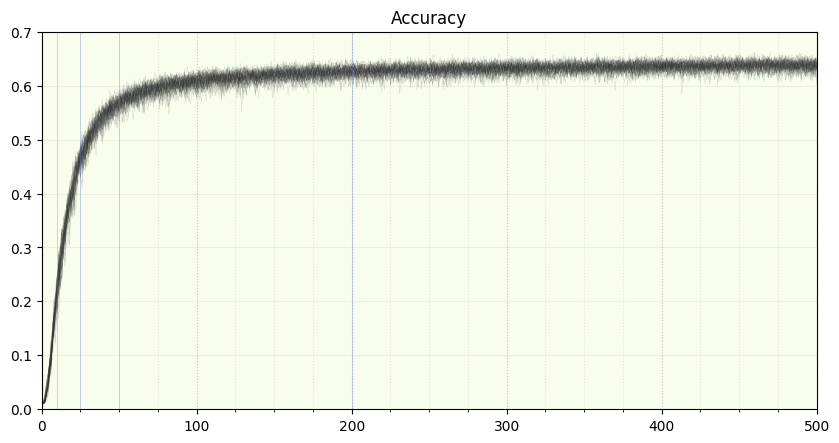

In [32]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_facecolor("#F7FEEB")
ax.set_ylim(0,0.7)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [0,0.7]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70",linestyle="-")

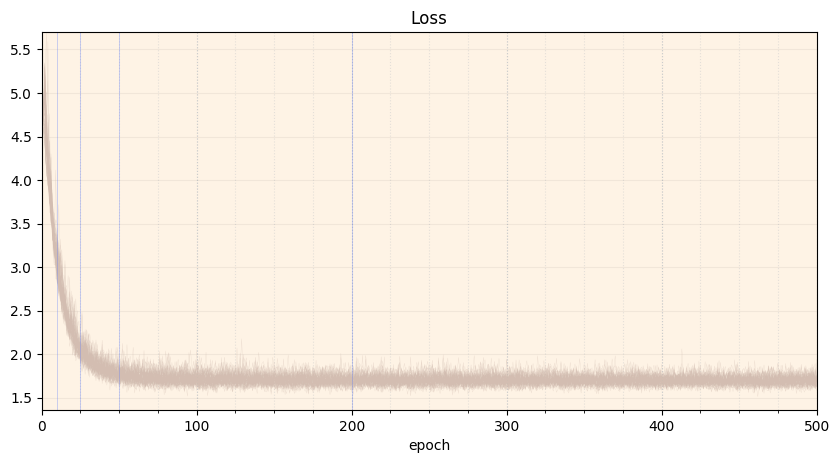

In [33]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [ymin,ymax]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70")

In [34]:
def plotBox(df, **kwargs):
    boxcolor=(.3,.3,.3)
    meanlineprops = dict(linewidth=1, color=(.7,.7,.8), linestyle="--")
    medianprops = dict(linestyle='-', linewidth=1)
    color = dict(caps=boxcolor,whiskers=boxcolor,boxes=boxcolor, medians=boxcolor)
    (ax,lines) = df.plot.box(showmeans=True, meanline=True, patch_artist=False,
                    color=color, meanprops=meanlineprops, medianprops=medianprops,
                    return_type='both',**kwargs)
#    print lines.keys()
    ax.yaxis.grid(linestyle=":",color="#cccccc")
# #     plotText(ax, lines)
# #     ["medians"],"median")
# #     plotText(ax, lines["means"],"mean")
# #     plotText(ax, lines["boxes"],"quartile")
# #     plotText(ax, lines["caps"],"caps")
# #    box = ax.artists[0]
#     #box.set_facecolor("#eeeeee")
    
#     for median in lines["medians"]:
#         x,y = median.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]-0.0001, 'median', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
#     for mean in lines["means"]:
#         x,y = mean.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]+0.0007, 'mean', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
    return ax

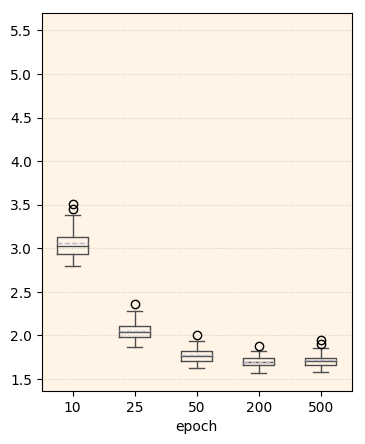

In [35]:
ax = plotBox(df_loss_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Loss")
ax.set_xlabel("epoch")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1
ax.set_ylim(ymin,ymax)
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_facecolor("#FFAC3620")

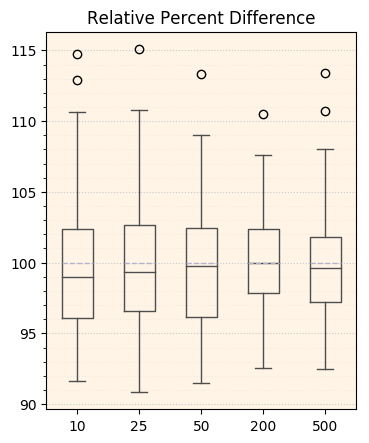

In [40]:
ax = plotBox(df_loss_p.loc[index].T,figsize=(4,5))
ax.set_yticks(np.arange(90,116,5))
ax.set_yticks(np.arange(90,116,1),minor=True)
ax.yaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.25)
ax.set_title("Relative Percent Difference")
ax.set_facecolor("#FFAC3620")

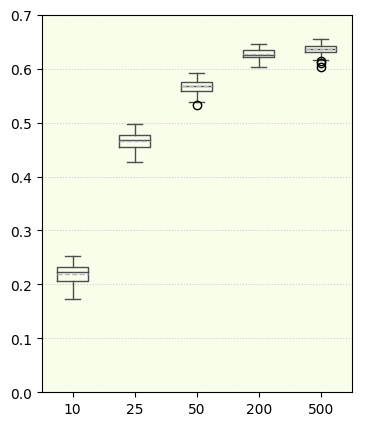

In [41]:
ax = plotBox(df_acc_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Accuracy")
#ax.set_xlabel("epoch")
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_ylim(0,0.7)
ax.set_facecolor("#CBFF7725")

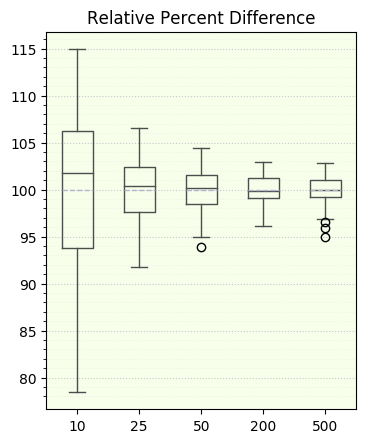

In [45]:
ax = plotBox(df_acc_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
ax.set_yticks(np.arange(78,117,1),minor=True)
ax.yaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.25)
ax.set_facecolor("#CBFF7725")